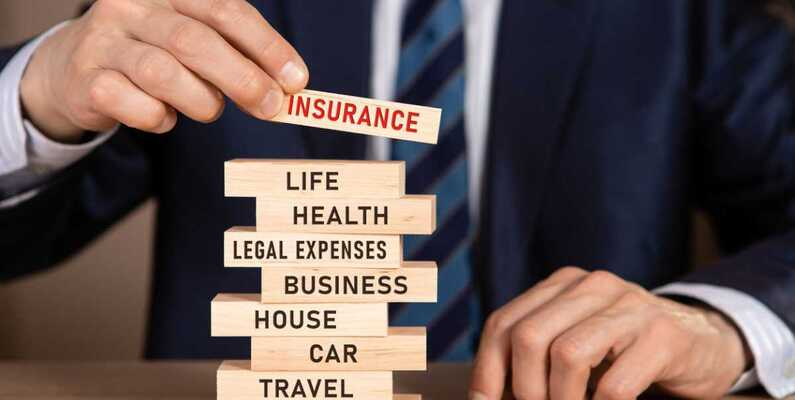

# **Forcasting Healthcare Insurance Costs with Data-driven Insights**

Leveraging a sizable dataset of more than **10 lakh records** from the hospitality insurance industry, this machine learning study aims to transform the US healthcare insurance cost forecasting process. The study uses cutting-edge machine learning approaches to find significant patterns and insights that will provide a detailed understanding of the intricate interactions between many elements affecting insurance rates. With a focus on healthcare consumption patterns, medical history, demographics, and regional factors, the initiative aims to produce accurate and trustworthy forecasts. The expected results could completely change the way healthcare insurance is shaped in the future, making the sector more adaptable and resilient to change as people's requirements as well as those of businesses do. In the end, this program helps to create a fair and sustainable healthcare system in the United States.






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/insurance ML project.csv')
df

,Unnamed: 0,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,0,46.0,male,21.450000,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,1,25.0,female,25.380000,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,2,38.0,male,44.880000,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,3,25.0,male,19.890000,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,4,49.0,male,38.210000,3,yes,northwest,Diabetes,High blood pressure,Rarely,?,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000598,1000598,30.0,male,98.174962,4,no,southwest,None,Diabetes,Frequently,White collar,Premium,18297.080232
1000599,1000599,31.0,male,78.767770,2,yes,northwest,None,Heart disease,Rarely,?,Basic,26597.128109
1000600,1000600,26.0,female,82.092998,4,no,southeast,High blood pressure,pressure,Never,?,Premium,28188.826723
1000601,1000601,38.0,male,77.348163,4,yes,northwest,None,pressure,Occasionally,Blue collar,Premium,25652.031477


In [ ]:
df.head()

,Unnamed: 0,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,0,46.0,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,1,25.0,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,2,38.0,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,3,25.0,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,4,49.0,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,?,Standard,19268.309838


In [ ]:
df.tail()

,Unnamed: 0,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
1000598,1000598,30.0,male,98.174962,4,no,southwest,None,Diabetes,Frequently,White collar,Premium,18297.080232
1000599,1000599,31.0,male,78.767770,2,yes,northwest,None,Heart disease,Rarely,?,Basic,26597.128109
1000600,1000600,26.0,female,82.092998,4,no,southeast,High blood pressure,pressure,Never,?,Premium,28188.826723
1000601,1000601,38.0,male,77.348163,4,yes,northwest,None,pressure,Occasionally,Blue collar,Premium,25652.031477
1000602,1000602,21.0,female,74.203853,3,no,northwest,Diabetes,Heart disease,Never,Student,Basic,18587.381667


In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0                  int64
age                       float64
gender                     object
bmi                       float64
children                    int64
smoker                     object
region                     object
medical_history            object
family_medical_history     object
exercise_frequency         object
occupation                 object
coverage_level             object
charges                   float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000603 entries, 0 to 1000602
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1000603 non-null  int64  
 1   age                     990580 non-null   float64
 2   gender                  1000603 non-null  object 
 3   bmi                     990604 non-null   float64
 4   children                1000603 non-null  int64  
 5   smoker                  999583 non-null   object 
 6   region                  990396 non-null   object 
 7   medical_history         1000603 non-null  object 
 8   family_medical_history  999606 non-null   object 
 9   exercise_frequency      999595 non-null   object 
 10  occupation              1000603 non-null  object 
 11  coverage_level          1000603 non-null  object 
 12  charges                 1000603 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 99.2+ MB

In [ ]:
df.describe()

,Unnamed: 0,age,bmi,children,charges
count,1.000603e+06,990580.000000,990604.000000,1.000603e+06,1.000603e+06
mean,5.003010e+05,41.491912,34.026676,2.508533e+00,1.673866e+04
std,2.888494e+05,13.852014,9.292291,1.787644e+00,4.418247e+03
min,0.000000e+00,18.000000,18.000000,0.000000e+00,1.000000e+01
25%,2.501505e+05,30.000000,26.020000,1.000000e+00,1.360224e+04
50%,5.003010e+05,41.000000,34.010000,3.000000e+00,1.662491e+04
75%,7.504515e+05,53.000000,42.000000,4.000000e+00,1.978527e+04
max,1.000602e+06,65.000000,99.969148,5.000000e+01,3.256156e+04


In [ ]:
df.describe(include='O')

,gender,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level
count,1000603,999583,990396,1000603,999606,999595,1000603,1000603
unique,2,2,4,5,5,4,5,3
top,male,yes,northeast,None,None,Rarely,Unemployed,Basic
freq,500393,499932,247975,250906,250278,250428,248187,333720


In [ ]:
df.isna().sum()

Unnamed: 0                    0
age                       10023
gender                        0
bmi                        9999
children                      0
smoker                     1020
region                    10207
medical_history               0
family_medical_history      997
exercise_frequency         1008
occupation                    0
coverage_level                0
charges                       0
dtype: int64

In [ ]:
df.shape

(1000603, 13)

In [ ]:
df.nunique()

Unnamed: 0                1000603
age                            48
gender                          2
bmi                          3801
children                       42
smoker                          2
region                          4
medical_history                 5
family_medical_history          5
exercise_frequency              4
occupation                      5
coverage_level                  3
charges                   1000603
dtype: int64

In [ ]:
# droping unwanted columns

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,male,21.450000,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25.0,female,25.380000,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38.0,male,44.880000,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25.0,male,19.890000,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49.0,male,38.210000,3,yes,northwest,Diabetes,High blood pressure,Rarely,?,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
1000598,30.0,male,98.174962,4,no,southwest,None,Diabetes,Frequently,White collar,Premium,18297.080232
1000599,31.0,male,78.767770,2,yes,northwest,None,Heart disease,Rarely,?,Basic,26597.128109
1000600,26.0,female,82.092998,4,no,southeast,High blood pressure,pressure,Never,?,Premium,28188.826723
1000601,38.0,male,77.348163,4,yes,northwest,None,pressure,Occasionally,Blue collar,Premium,25652.031477


## **Handling Missing Values**

In [ ]:
df.isna().sum()

age                       10023
gender                        0
bmi                        9999
children                      0
smoker                     1020
region                    10207
medical_history               0
family_medical_history      997
exercise_frequency         1008
occupation                    0
coverage_level                0
charges                       0
dtype: int64

In [ ]:
a=df['age'].mode()[0]
b=df['bmi'].mean()
c=df['smoker'].mode().iloc[0]
d=df['region'].mode().iloc[0]
e=df['family_medical_history'].mode().iloc[0]
f=df['exercise_frequency'].mode().iloc[0]

df=df.fillna({'age':a,'bmi':b,'smoker':c,'region':d,'family_medical_history':e,\
              'exercise_frequency':f})
df.isna().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

In [ ]:
df

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,male,21.450000,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25.0,female,25.380000,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38.0,male,44.880000,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25.0,male,19.890000,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49.0,male,38.210000,3,yes,northwest,Diabetes,High blood pressure,Rarely,?,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
1000598,30.0,male,98.174962,4,no,southwest,None,Diabetes,Frequently,White collar,Premium,18297.080232
1000599,31.0,male,78.767770,2,yes,northwest,None,Heart disease,Rarely,?,Basic,26597.128109
1000600,26.0,female,82.092998,4,no,southeast,High blood pressure,pressure,Never,?,Premium,28188.826723
1000601,38.0,male,77.348163,4,yes,northwest,None,pressure,Occasionally,Blue collar,Premium,25652.031477


## **Data Visualization - Categorical columns**

In [ ]:
sns.set()

In [ ]:
gender=df['gender'].value_counts()
gender

male      500393
female    500210
Name: gender, dtype: int64

Text(0.5, 1.0, 'gender count')

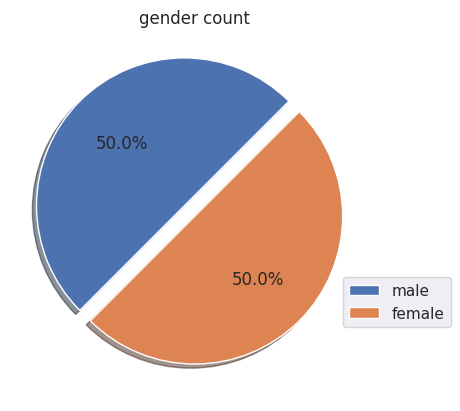

In [ ]:

plt.pie(gender,autopct='%1.1f%%',explode=(0.1,0),shadow=True,startangle=45)
plt.legend(gender.index,loc=(0.9,0.2))
plt.title('gender count')

In [ ]:
smoker=df['smoker'].value_counts()
smoker

yes    500952
no     499651
Name: smoker, dtype: int64

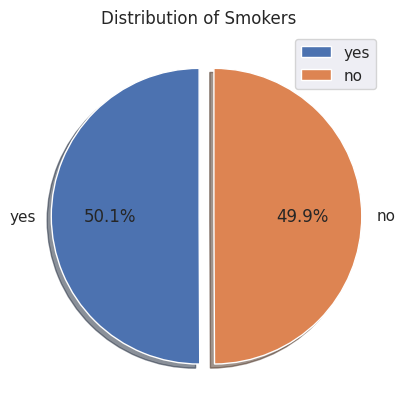

In [ ]:
explode = (0, 0.1)
plt.pie(smoker, labels=smoker.index, autopct='%1.1f%%', startangle=90, shadow=True,explode=explode)
plt.legend(smoker.index)
plt.title('Distribution of Smokers')
plt.show()


In [ ]:
region=df['region'].value_counts()
region

northeast    258182
southwest    247672
northwest    247484
southeast    247265
Name: region, dtype: int64

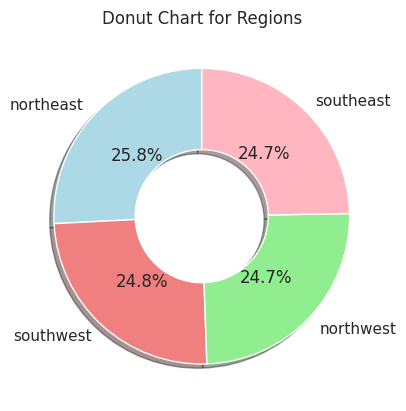

In [ ]:

plt.pie(region, labels=region.index, autopct='%1.1f%%',
        startangle=90, wedgeprops=dict(width=0.55), colors=['lightblue', 'lightcoral', 'lightgreen', 'lightpink'],shadow=True)

centre_circle = plt.Circle((0, 0), 0.0, color='white', fc='white')
plt.title('Donut Chart for Regions')
plt.show()

In [ ]:
med=df['medical_history'].value_counts()
med

None                   250906
Heart disease          250265
High blood pressure    249912
Diabetes               249455
pressure                   65
Name: medical_history, dtype: int64

In [ ]:
mapping = {'pressure': 'High blood pressure'}

df['medical_history'] = df['medical_history'].replace(mapping)
df['family_medical_history'] = df['family_medical_history'].replace(mapping)

<ipython-input-34-8bfd33c101f5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['medical_history'],palette='viridis')


<Axes: xlabel='medical_history', ylabel='count'>

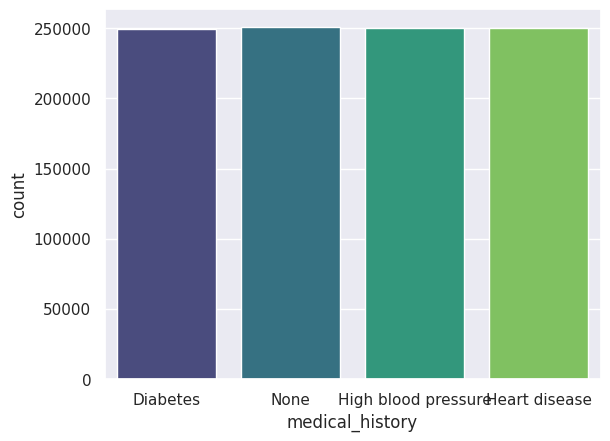

In [ ]:
sns.countplot(x=df['medical_history'],palette='viridis')

In [ ]:
fam=df['family_medical_history'].value_counts()
fam

None                   251275
Heart disease          249912
High blood pressure    249786
Diabetes               249630
Name: family_medical_history, dtype: int64

<ipython-input-36-ee690f2227f6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['family_medical_history'],palette='viridis')


<Axes: xlabel='family_medical_history', ylabel='count'>

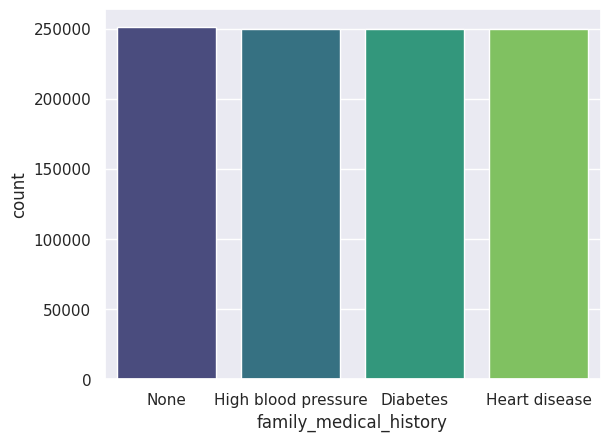

In [ ]:
sns.countplot(x=df['family_medical_history'],palette='viridis')

In [ ]:
occupation=df['occupation'].value_counts()
occupation

Unemployed      248187
Student         247822
Blue collar     247509
White collar    246915
?                10170
Name: occupation, dtype: int64

<ipython-input-38-4b3ad33410da>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['occupation'],palette='viridis')


<Axes: xlabel='occupation', ylabel='count'>

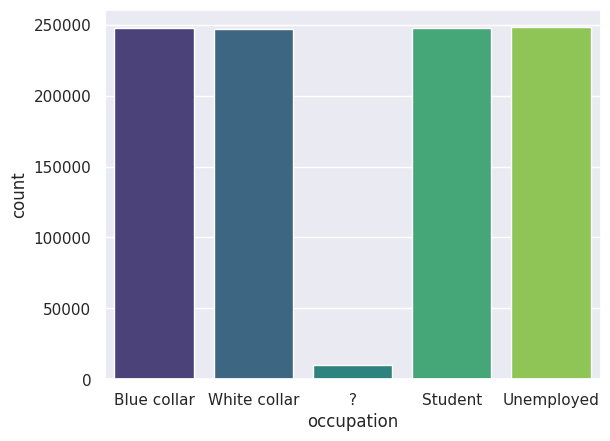

In [ ]:
sns.countplot(x=df['occupation'],palette='viridis')

In [ ]:
coverage=df['coverage_level'].value_counts()
coverage

Basic       333720
Standard    333716
Premium     333167
Name: coverage_level, dtype: int64

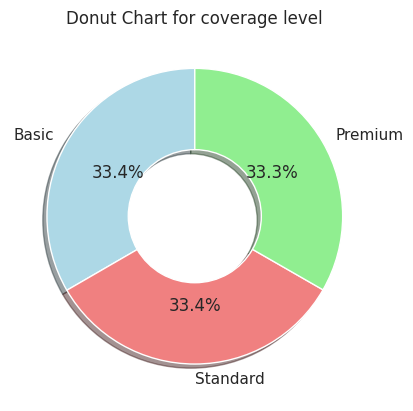

In [ ]:
plt.pie(coverage, labels=coverage.index, autopct='%1.1f%%',
        startangle=90, wedgeprops=dict(width=0.55), colors=['lightblue', 'lightcoral', 'lightgreen', 'lightpink'],shadow=True)

centre_circle = plt.Circle((0, 0), 0.0, color='white', fc='white')
plt.title('Donut Chart for coverage level')
plt.show()

## **Data Visualization - Numerical Columns**

<ipython-input-41-a408b81fbc11>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='charges', data=df,palette='viridis')


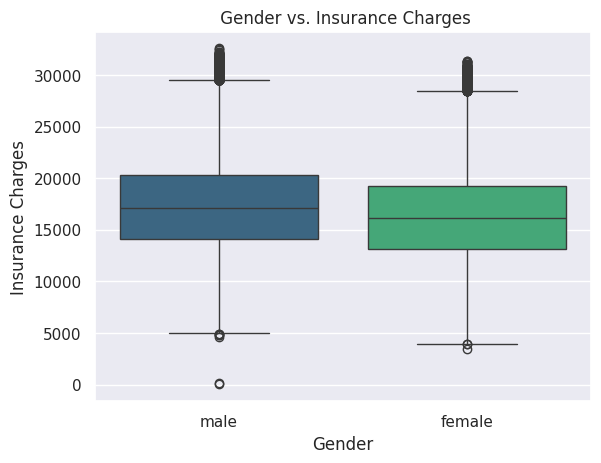

In [ ]:


sns.boxplot(x='gender', y='charges', data=df,palette='viridis')

plt.title(' Gender vs. Insurance Charges')
plt.xlabel('Gender')
plt.ylabel('Insurance Charges')
plt.show()


<Axes: xlabel='smoker', ylabel='charges'>

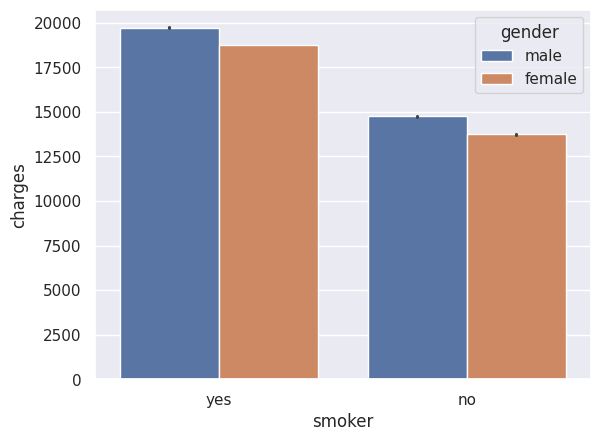

In [ ]:
sns.barplot(x=df['smoker'],y=df['charges'],hue='gender',data=df)

<ipython-input-43-86352090af4e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df,palette='viridis')


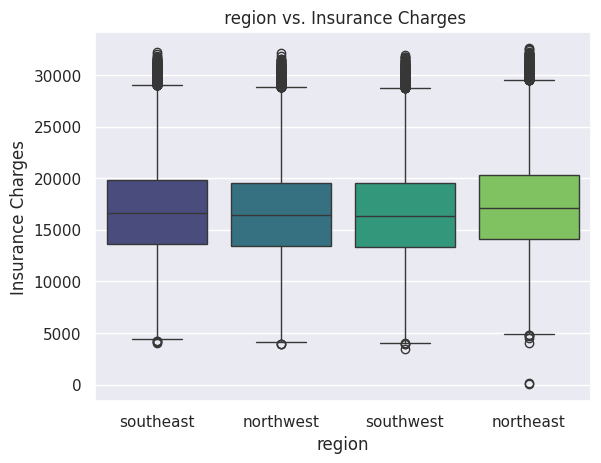

In [ ]:
sns.boxplot(x='region', y='charges', data=df,palette='viridis')

plt.title(' region vs. Insurance Charges')
plt.xlabel('region')
plt.ylabel('Insurance Charges')
plt.show()

<ipython-input-44-6260500d5024>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='medical_history', y='charges', data=df,palette='viridis')


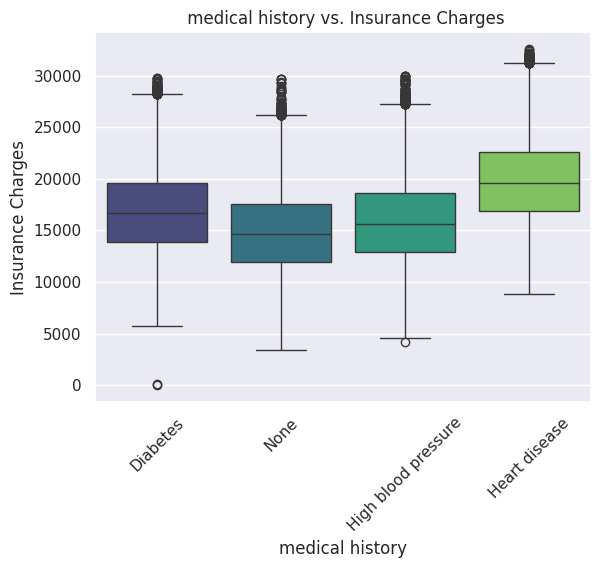

In [ ]:
sns.boxplot(x='medical_history', y='charges', data=df,palette='viridis')

plt.title(' medical history vs. Insurance Charges')
plt.xlabel('medical history')
plt.ylabel('Insurance Charges')
plt.xticks(rotation=45)
plt.show()

<ipython-input-45-e138b9814e65>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='family_medical_history', y='charges', data=df,palette='viridis')


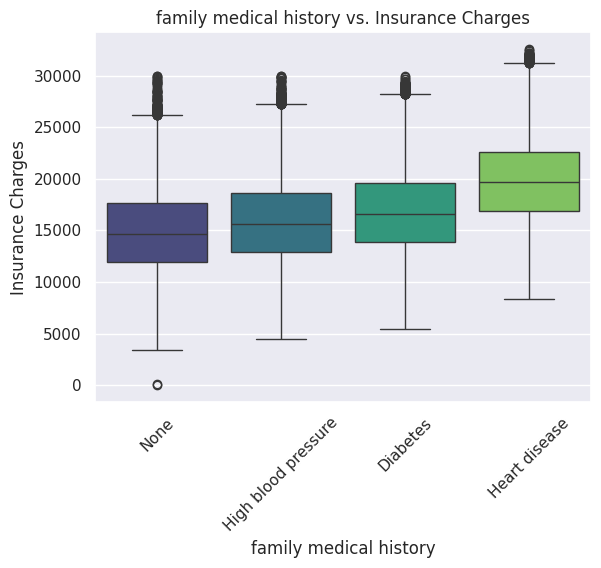

In [ ]:
sns.boxplot(x='family_medical_history', y='charges', data=df,palette='viridis')

plt.title('family medical history vs. Insurance Charges')
plt.xlabel('family medical history')
plt.ylabel('Insurance Charges')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['occupation'].value_counts()


Unemployed      248187
Student         247822
Blue collar     247509
White collar    246915
?                10170
Name: occupation, dtype: int64

<ipython-input-49-7f6c9d84770a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='occupation', y='charges', data=df,palette='viridis')


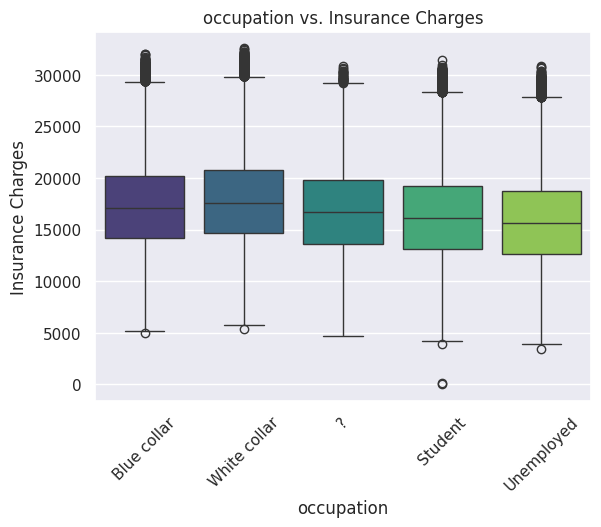

In [ ]:
sns.boxplot(x='occupation', y='charges', data=df,palette='viridis')

plt.title('occupation vs. Insurance Charges')
plt.xlabel('occupation')
plt.ylabel('Insurance Charges')
plt.xticks(rotation=45)
plt.show()

## **Replacing Special Charecters**

In [ ]:
df['occupation'].replace('?',np.NaN,inplace=True)
q=df['occupation'].mode().iloc[0]
df['occupation'].fillna(q,inplace=True)
df.isna().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

<ipython-input-51-7f6c9d84770a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='occupation', y='charges', data=df,palette='viridis')


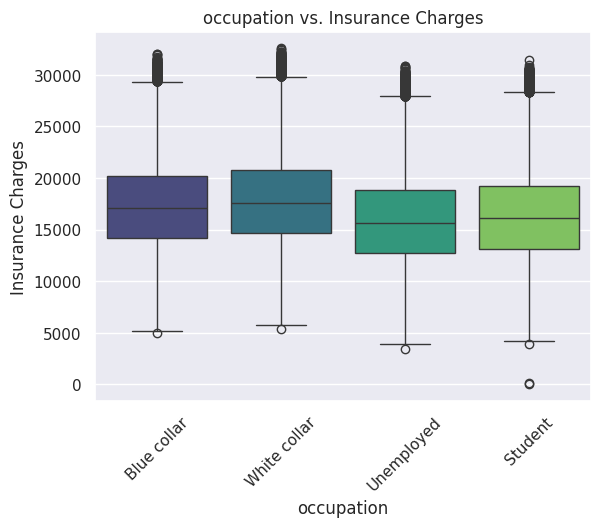

In [ ]:
sns.boxplot(x='occupation', y='charges', data=df,palette='viridis')

plt.title('occupation vs. Insurance Charges')
plt.xlabel('occupation')
plt.ylabel('Insurance Charges')
plt.xticks(rotation=45)
plt.show()

<ipython-input-52-f10c9776df92>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='coverage_level', y='charges', data=df,palette='viridis');


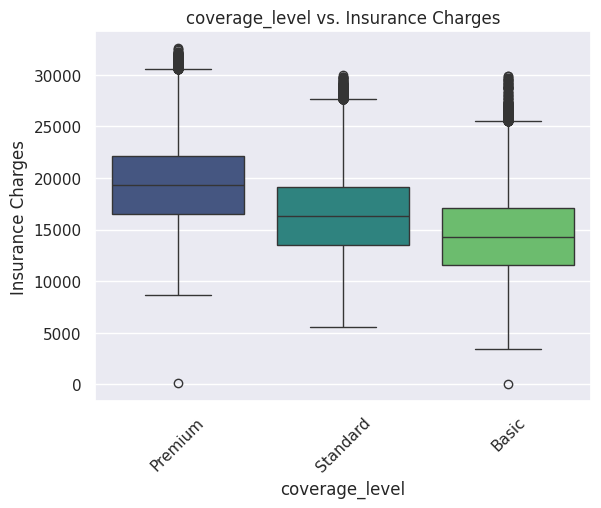

In [ ]:

sns.boxplot(x='coverage_level', y='charges', data=df,palette='viridis');

plt.title('coverage_level vs. Insurance Charges')
plt.xlabel('coverage_level')
plt.ylabel('Insurance Charges')
plt.xticks(rotation=45)
plt.show()

## **Target Dustribution**

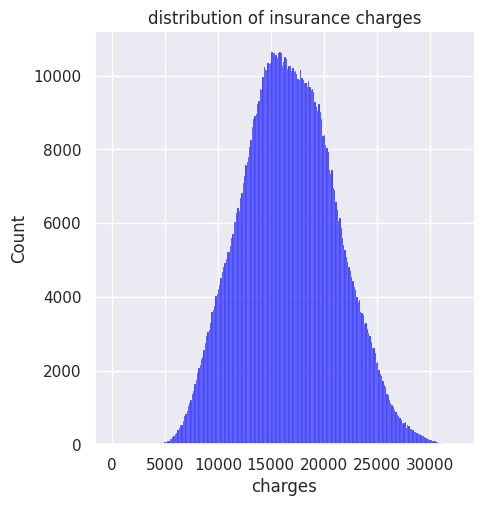

In [ ]:
sns.displot(df['charges'],color='blue')
plt.title('distribution of insurance charges')
plt.show()

## **Detecting and Removing Outliers**

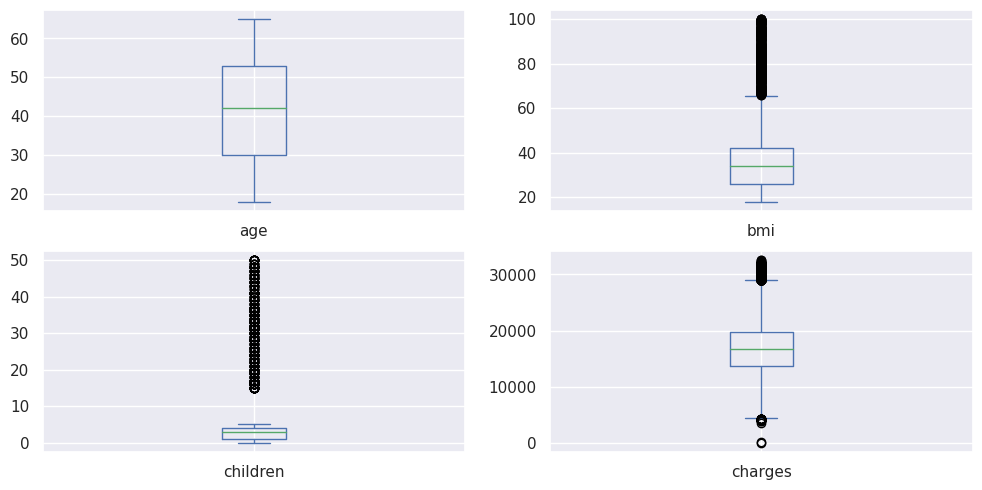

In [ ]:
df.plot(kind='box',figsize=(12,12),layout=(4,2),sharex=False,subplots=True);

In [ ]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_outliers_removed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_outliers_removed

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    df = remove_outliers_iqr(df, column)



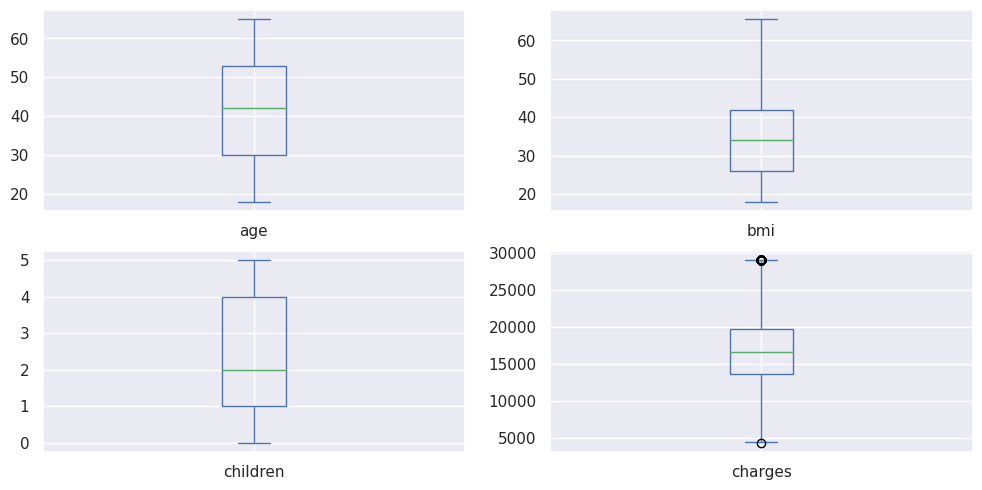

In [ ]:
df.plot(kind='box',figsize=(12,12),layout=(4,2),sharex=False,subplots=True);

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'smoker', 'region', 'medical_history',
       'family_medical_history', 'exercise_frequency', 'occupation',
       'coverage_level'],
      dtype='object')

## **Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for i in categorical_columns:
  df[i]=lab.fit_transform(df[i])

df

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,1,21.450000,5,1,2,0,3,1,0,1,20460.307669
1,25.0,0,25.380000,2,1,1,0,2,2,3,1,20390.899218
2,38.0,1,44.880000,2,1,3,3,2,2,0,1,20204.476302
3,25.0,1,19.890000,0,0,1,3,0,3,3,2,11789.029843
4,49.0,1,38.210000,3,1,1,0,2,3,2,2,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
1000576,27.0,1,65.594954,3,1,0,2,2,0,1,2,25315.830636
1000580,28.0,0,53.882467,4,0,3,2,2,1,0,2,27123.528150
1000581,32.0,0,53.615824,1,1,1,1,3,0,1,2,18633.468267
1000582,25.0,0,57.259826,2,1,2,0,1,0,0,1,28938.420804


## **Feature Selection**

In [ ]:
df.corr()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
age,1.000000,-0.001389,0.001191,-0.001372,0.000045,0.001424,0.000260,0.000988,-0.000382,-0.000703,-0.000123,0.061867
gender,-0.001389,1.000000,-0.001504,0.000434,-0.001136,-0.000463,0.001853,-0.000694,-0.000055,0.000759,0.000476,0.111499
bmi,0.001191,-0.001504,1.000000,-0.001776,-0.001061,0.001437,0.001863,0.000620,0.000944,-0.000622,-0.000491,0.102370
children,-0.001372,0.000434,-0.001776,1.000000,-0.000575,0.000404,0.000930,0.000071,0.000570,-0.000400,0.000560,0.075467
smoker,0.000045,-0.001136,-0.001061,-0.000575,1.000000,0.001134,-0.000553,0.001617,-0.000405,-0.000424,0.001179,0.565205
region,0.001424,-0.000463,0.001437,0.000404,0.001134,1.000000,0.000752,0.000190,0.000260,0.000356,-0.001364,-0.053682
medical_history,0.000260,0.001853,0.001863,0.000930,-0.000553,0.000752,1.000000,0.000517,-0.001177,-0.000788,-0.000551,-0.254275
family_medical_history,0.000988,-0.000694,0.000620,0.000071,0.001617,0.000190,0.000517,1.000000,0.001078,0.000452,-0.002859,-0.253060
exercise_frequency,-0.000382,-0.000055,0.000944,0.000570,-0.000405,0.000260,-0.001177,0.001078,1.000000,-0.000360,-0.000965,-0.086684
occupation,-0.000703,0.000759,-0.000622,-0.000400,-0.000424,0.000356,-0.000788,0.000452,-0.000360,1.000000,-0.000981,0.024183


<Axes: >

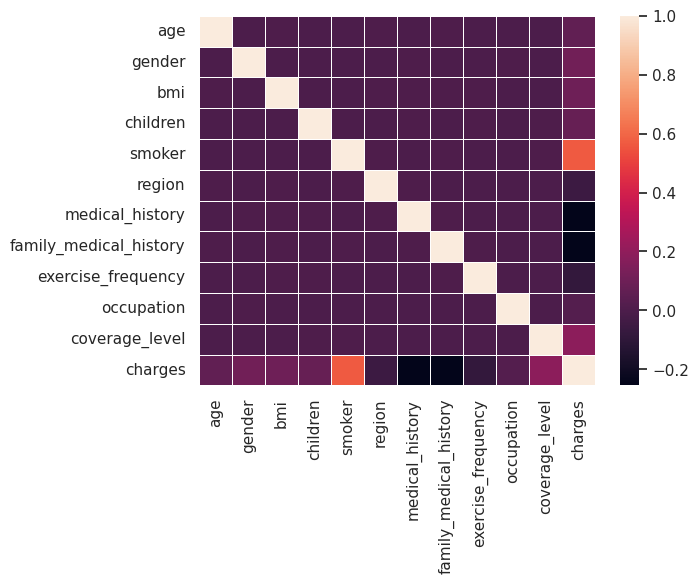

In [ ]:
sns.heatmap(df.corr(), linewidth=.5)

## **Seperating input and output**

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

## **Cross validation & Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## **`Linear Regression`**

In [ ]:
param={'fit_intercept': [True,False],'copy_X': [True,False],'positive':[True,False]}

clf1 =  GridSearchCV(LinearRegression(),param, cv=3, return_train_score=False)
clf1.fit(x_train,y_train)
print(clf1.best_params_)

{'copy_X': True, 'fit_intercept': True, 'positive': False}


In [ ]:
print(clf1.best_score_)

0.527303274136628


## **Decision Tree**

In [ ]:
param1={'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

clf2 =  GridSearchCV(DecisionTreeRegressor(),param1, cv=3, return_train_score=False)
clf2.fit(x_train,y_train)
print(clf2.best_params_)

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
print(clf2.best_score_)

0.983491794484975


## **Random Forest**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
num_folds = 3
scores = cross_val_score(rf_model, x_train, y_train, cv=num_folds, scoring='r2')
print(f"R-squared for {num_folds}-fold Cross-Validation:")
print(scores)
mean_score = scores.mean()
print(f'Mean Cross-Validation Score (R-squared): {mean_score}')




R-squared for 3-fold Cross-Validation:
[0.98952127 0.98922026 0.98953111]
Mean Cross-Validation Score (R-squared): 0.989424211016548


In [ ]:
# selected Random forest Model

In [ ]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
y_pred

array([19760.25788496, 21360.04473319, 24557.18654902, ...,
        8231.38085718, 19658.06536007, 17541.6704887 ])

## **Calculating the Loss**

In [ ]:
df1=pd.DataFrame({'actual value':y_test,'predict value':y_pred,'difference':y_test-y_pred})
df1

,actual value,predict value,difference
797975,20193.144346,19760.257885,432.886461
495090,21457.555119,21360.044733,97.510386
410461,24183.633082,24557.186549,-373.553467
98557,16099.022855,15710.097118,388.925737
570953,9301.286222,9860.215076,-558.928854
...,...,...,...
922522,6773.822879,7465.731731,-691.908852
794351,23539.408419,22910.370593,629.037826
505724,7755.582564,8231.380857,-475.798293
80755,19684.043474,19658.065360,25.978114


## **Model Perfomance**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

In [ ]:
print('mae',mean_absolute_error(y_test,y_pred))
print('mape',mean_absolute_percentage_error(y_test,y_pred))
print('r2 score',r2_score(y_test,y_pred))
print('mse',mean_squared_error(y_test,y_pred))
print('rmse',np.sqrt(mean_squared_error(y_test,y_pred)))

mae 325.1989153347585
mape 0.021073254347609118
r2 score 0.9901529298810301
mse 188801.8199432358
rmse 434.5133138848979


## **Prediction**

In [ ]:
predict=rf_model.predict([[50,1,50,3,1,3,3,2,2,0,1]])
predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([20754.09905719])

## **Saving the Model**

In [ ]:
import joblib
joblib.dump(rf_model,'model.pkl')

['model.pkl']

In conclusion, by utilizing an extensive data set from the US hospitality insurance industry, our machine learning study has completely redesigned healthcare insurance cost predictions. By utilizing sophisticated machine learning methods, such as insightful data visualizations and precise hyperparameter adjustments, the research determined that the **Random Forest Regressor** was the most effective method, obtaining an astounding accuracy rate around **99%**. Beyond accuracy, the model was successfully saved as a file by the implementation, allowing for a smooth integration for practical use cases. This achievement demonstrates the project's ability to completely transform the healthcare insurance market by offering a strong and flexible instrument for the industry's strategic planning, policy creation, and well-informed decision-making.








